In [ ]:
from qiskit import QuantumCircuit, execute
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

class ProductData:
    def __init__(self, data):
        self.data = data

    def get_data(self):
        return self.data

    def get_qubit(self):
        return len(self.data).bit_length()

    def get_qubit_data(self):
        qubit = self.get_qubit()
        qubit_data = []
        for i in range(qubit):
            qubit_data.append(self.data >> i & 1)
        return qubit_data

ModuleNotFoundError: No module named 'qiskit.execute_function'

In [4]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

class ProductData:
    def __init__(self, data):
        """
        Initialize the ProductData class with the provided data.
        Args:
            data (int): Integer representation of the product data.
        """
        self.data = data

    def get_data(self):
        """
        Returns the raw data.
        Returns:
            int: The raw data.
        """
        return self.data

    def get_qubit(self):
        """
        Calculates the number of qubits required to represent the data.
        Returns:
            int: Number of qubits required.
        """
        return len(bin(self.data)) - 2  # Number of bits in binary representation (excluding '0b').

    def get_qubit_data(self):
        """
        Extracts individual bits from the data to represent as qubits.
        Returns:
            list: List of bits representing the data.
        """
        qubit_count = self.get_qubit()
        return [(self.data >> i) & 1 for i in range(qubit_count)]  # Extract each bit from data.

# Example Usage
if __name__ == "__main__":
    # Create an instance of ProductData
    product = ProductData(25)  # Example: 25 (binary: 11001)
    print("Data:", product.get_data())
    print("Number of Qubits:", product.get_qubit())
    print("Qubit Data:", product.get_qubit_data())

    # Create a quantum circuit based on the qubit data
    qubit_data = product.get_qubit_data()
    num_qubits = len(qubit_data)
    qc = QuantumCircuit(num_qubits)

    # Initialize the circuit with the qubit data
    for i, bit in enumerate(qubit_data):
        if bit == 1:
            qc.x(i)  # Apply X gate to set the qubit to |1>

    # Add a barrier for visualization
    qc.barrier()

    # Add Hadamard gates to all qubits
    for i in range(num_qubits):
        qc.h(i)

    # Measure the qubits
    qc.measure_all()

    # Simulate the circuit
    simulator = AerSimulator()
    result = simulator.run(qc).result()
    counts = result.get_counts()

    # Print the results and show the histogram
    print("Simulation Result:", counts)
    plot_histogram(counts).show()

Data: 25
Number of Qubits: 5
Qubit Data: [1, 0, 0, 1, 1]
Simulation Result: {'00100': 27, '01101': 37, '00000': 34, '01011': 36, '00010': 20, '01001': 46, '10000': 42, '11101': 32, '00111': 35, '10010': 27, '11010': 27, '01100': 30, '11001': 32, '11011': 27, '01000': 30, '01010': 50, '10001': 34, '00110': 29, '10011': 33, '01110': 35, '01111': 22, '10111': 28, '11100': 23, '11000': 32, '11111': 36, '10110': 28, '10101': 27, '00001': 35, '11110': 34, '00101': 38, '10100': 33, '00011': 25}


C:\Users\karan\AppData\Local\Temp\ipykernel_24456\1722256418.py:74: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_histogram(counts).show()


In [5]:
# %pip install qiskit-aer-0.16.0

import json
import numpy as np
from qiskit import QuantumInstance
from qiskit_machine_learning.kernels import QuantumKernel
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the data from response.json
def load_data(filepath="response.json"):
    with open(filepath, 'r') as f:
        data = json.load(f)
    return data

# Extract features from the data
def extract_features(data):
    features = []
    for item in data:
        text_length = len(item["post"]["text"])
        sentiment = 1 if item["sentiment"] == "positive" else -1 if item["sentiment"] == "negative" else 0
        created_at = item["post"]["createdAt"]
        features.append([text_length, sentiment, created_at])
    return np.array(features)

# Load and preprocess the data
data = load_data()
features = extract_features(data)

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Reduce dimensionality for visualization (optional)
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Perform classical K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(features_pca)
labels = kmeans.labels_

# Print the cluster labels
print("Cluster labels:", labels)

# Quantum K-Means clustering (optional)
# Define a quantum instance
quantum_instance = QuantumInstance(Aer.get_backend('qasm_simulator'), shots=1024)

# Define a quantum kernel
quantum_kernel = QuantumKernel(quantum_instance=quantum_instance)

# Perform quantum K-Means clustering
qkmeans = KMeans(n_clusters=3, random_state=0)
qkmeans.fit(quantum_kernel.evaluate(features_pca))
q_labels = qkmeans.labels_

# Print the quantum cluster labels

ImportError: cannot import name 'QuantumInstance' from 'qiskit' (c:\Users\karan\AppData\Local\Programs\Python\Python312\Lib\site-packages\qiskit\__init__.py)

In [4]:
import json
import numpy as np
from datetime import datetime
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def load_data(filepath="response.json"):
    with open(filepath, 'r') as f:
        data = json.load(f)
    return data

def extract_features(data):
    features = []
    for item in data:
        text_length = len(item["post"]["text"])
        sentiment = 1 if item["sentiment"] == "positive" else -1 if item["sentiment"] == "negative" else 0
        # Convert timestamp to Unix timestamp (numerical value)
        created_at = datetime.strptime(item["post"]["createdAt"], "%Y-%m-%dT%H:%M:%S.%fZ").timestamp()
        features.append([text_length, sentiment, created_at])
    return np.array(features, dtype=float)

# Load and preprocess the data
data = load_data()
features = extract_features(data)

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Perform classical K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features_pca)
labels = kmeans.labels_

# Print the cluster labels
print("Classical Cluster labels:", labels)

# Set up quantum components
feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement="linear")
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
quantum_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

# Perform quantum K-Means clustering
qkmeans = KMeans(n_clusters=3, random_state=42)
q_kernel_matrix = quantum_kernel.evaluate(x_vec=features_pca, y_vec=features_pca)
qkmeans.fit(q_kernel_matrix)
q_labels = qkmeans.labels_

# Print the quantum cluster labels
print("Quantum Cluster labels:", q_labels)

Classical Cluster labels: [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Quantum Cluster labels: [2 2 2 2 2 2 2 2 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


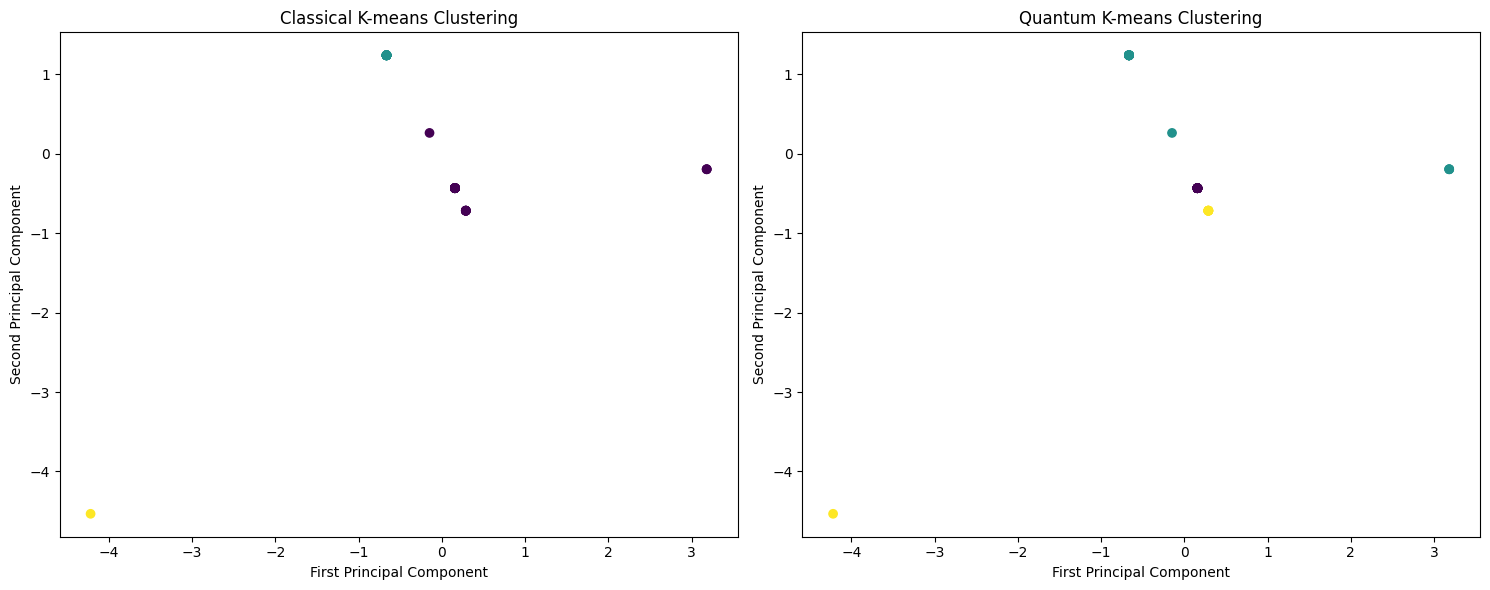

In [5]:
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 6))

# Plot Classical K-means results
plt.subplot(1, 2, 1)
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels, cmap='viridis')
plt.title('Classical K-means Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Plot Quantum K-means results
plt.subplot(1, 2, 2)
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=q_labels, cmap='viridis')
plt.title('Quantum K-means Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.tight_layout()
plt.show()